# Q1) Gram-Schmidt Algorithm and QR decomposition

In [1]:
import sys
import random
from math import floor, log10, sqrt
import copy

i) Write a code to generate a random matrix A of size m × n with m > n and calculate its Frobenius norm, ∥ · ∥F . The entries of A must be of the form r.dddd (example 5.4316). The inputs are the positive integers m and n and the output should display the the dimensions and the calculated norm value.

                       Deliverable(s) : The code with the desired input and output (0.5)
-----------------------------------------------------------------------------------------------------------------------

In [2]:
# Significant digit conversion
'''
This method convert a digit into significant digit
x: digit
sig: significant digit form ex: 5 = r.dddd
'''
def tidy(x, sig):
    y = abs(x)
    if y <= sys.float_info.min:
        return 0.0000
    return round(x, sig-int(floor(log10(y)))-1)

In [3]:
# Calculate frobenius norm of matrix m
'''
This method calculate frobenius norm of a matrix
m: input matrix
sig: significant digit form ex: 5 = r.dddd
'''
def norm_frobenius(m, sig=5):
    sqr_sum = 0
    for r in range(len(m)):
        for c in range(len(m[r])):
            elm = abs(m[r][c])
            sqr_sum = tidy(sqr_sum + tidy((elm ** 2), sig), sig)
    return sqrt(sqr_sum)

In [4]:
# Matrix generator of size m x n
def generate_matrix(m, n, low_num=0.10000, up_num=9.9999, sig=5):
    return [[tidy(random.uniform(low_num, up_num), sig) for i in range(n)] for j in range(m)]

In [5]:
# Function to run frobenius norm calculator along with matrix generation
'''
Main entry point method for the Q1 part i answer, to calculate frobenius norm and display input matrix size
m: no of rows
n: no of columns
'''
def run_frobenius_calc(m, n):
    if m >= n:
        a = generate_matrix(m, n)
        print(f"\nMatrix size: {m}x{n}")
        frobenius_norm_val = tidy(norm_frobenius(a), 5)
        print(f"\nFrobenius norm value: {frobenius_norm_val}")
    else:
        print(f"\nPlease provide matrix size, where m > n.")

In [6]:
# Test run
run_frobenius_calc(5, 4)


Matrix size: 5x4

Frobenius norm value: 24.872


ii) Write a code to decide if Gram-Schmidt Algorithm can be applied to columns of a given matrix A through calculation of rank. The code should print appropriate messages indicating whether Gram-Schmidt is applicable on columns of the matrix or not.

                      Deliverable(s) : The code that performs the test. (1)
-----------------------------------------------------------------------------------------------------------------------

In [7]:
'''
This method checks if a given matrix is full rank
matrix: input matrix
d: significant digit
'''
def is_full_rank_matrix(matrix, d=5):
    r = len(matrix)
    c = len(matrix[0])
    
    # Significant digit conversion
    def tidy(x, sig):
        y = abs(x)
        if y <= sys.float_info.min:
            return 0.0000
        return round(x, sig-int(floor(log10(y)))-1)
         
    # Function for exchanging two rows of a matrix
    def swap(matrix, row1, row2, col):
        for i in range(col):
            temp = matrix[row1][i]
            matrix[row1][i] = matrix[row2][i]
            matrix[row2][i] = temp
             
    rank = c
    for row in range(0, rank, 1):
        # Diagonal element is not zero
        if matrix[row][row] != 0:
            for col in range(0, r, 1):
                if col != row:
                    multiplier = tidy((matrix[col][row] / matrix[row][row]), d)
                    for i in range(rank):
                        matrix[col][i] = tidy(matrix[col][i] - tidy((multiplier * matrix[row][i]), d), d)
        else:
            reduce = True
            for i in range(row + 1, r, 1):
                if matrix[i][row] != 0:
                    swap(matrix, row, i, rank)
                    reduce = False
                    break
            if reduce:
                rank -= 1
                for i in range(0, r, 1):
                    matrix[i][row] = matrix[i][rank]
            row -= 1
    return True if rank == min(r, c) else False

In [8]:
'''
Main entry point method for the Q1 part ii answer, to check gram schmidt applicability on input matrix
m: input matrix
d: significant digit
'''
def gram_schmidt_applicability_calc(m, d=5):
    check = is_full_rank_matrix(m, d)
    if check:
        print("\nGram-Schmidt is applicable on columns of the matrix.")
    else:
        print("\nGram-Schmidt is not applicable on columns of the matrix.")

In [9]:
# Test1
A = generate_matrix(7, 5)
gram_schmidt_applicability_calc(A)


Gram-Schmidt is applicable on columns of the matrix.


In [10]:
# Test2
a = [[3, 2, 4],
     [-1, 1, 2],
     [9, 5, 10]]
gram_schmidt_applicability_calc(a, 0)


Gram-Schmidt is not applicable on columns of the matrix.


In [11]:
# Test3
a = [[2.0,  1.0, -1.0],
     [-3.0,  -1.0,  2.0],
     [-2.0, 1.0,  2.0]]
gram_schmidt_applicability_calc(a)


Gram-Schmidt is applicable on columns of the matrix.


iii) Write a code to generate the orthogonal matrix Q from a matrix A by performing the Gram-Schmidt orthogonalization method. Ensure that A has linearly independent columns by checking the rank. Keep generating A until the linear independence is obtained.

                         Deliverable(s) : The code that produces matrix Q from A (1)
                         
-----------------------------------------------------------------------------------------------------------------------

In [12]:
'''
This method return the column from a matrix
matrix: input matrix
col: column index
'''
def get_matrix_column(matrix, col):
    column = []
    for row in matrix:
        elem = row[col]
        column.append(elem)
    return column

In [13]:
'''
This method set given column value in a matrix to given index
matrix: input matrix
n: no of rows
col_idx: column index to be set
col: column vector
'''
def set_matrix_column(matrix, n, col_idx, col):
    for row_idx in range(n):
        matrix[row_idx][col_idx] = col[row_idx]
    return matrix

In [14]:
'''
This method calculates the dot product of gievn input vectors
x: vector a
y: vector b
sig: significant digit
'''
def inner_dot(x, y, sig=5):
    return tidy(sum(tidy(x_i * y_i, sig) for x_i, y_i in zip(x, y)), sig)

In [15]:
'''
This method calculate the Q and R matrices using gram schmidt method
matrix: input matrix A
m: no of rows
n: no of columns
d: significant digit
'''
def gram_schmidt(matrix, m, n, d=5):
    n_add, n_mul, n_div = 0, 0, 0
    # Initialize Q and R matrices
    q = [[0 for x in range(n)] for y in range(m)]
    r = [[0 for x in range(n)] for y in range(n)]
    for j in range(n):
        # Step-1, v1 = a1
        v = get_matrix_column(matrix, j)
        # Skip the first column
        if j > 0:
            for i in range(j):
                # Find the inner product
                r[i][j] = inner_dot(get_matrix_column(q, i), get_matrix_column(matrix, j))
                n_add = n_add + m - 1
                n_mul = n_mul + m
                # Subtract the projection from v which causes v to become perpendicular to all columns of Q
                v=[tidy(x_i - y_i, d) for x_i, y_i in zip(v, [tidy(r[i][j] * x, d) for x in get_matrix_column(q, i)])]
                n_mul = n_mul + m
                n_add = n_add + m - 1
        # Find the L2 norm of the jth diagonal of R
        r[j][j] = tidy(sqrt(tidy(sum([tidy(x**2, d) for x in v]), d)), d)
        n_mul = n_mul + m + 1
        n_add = n_add + m - 1
        # The orthogonalized result is found and stored in the ith column of Q.
        q = set_matrix_column(q, n, j, [tidy(x / r[j][j], d) for x in v])
        n_div = n_div + m
    return (q, r, n_add, n_mul, n_div)

In [16]:
# Matrix generator of size m x n
def generate_matrix(m, n, low_num=0.10000, up_num=9.9999, sig=5):
    return [[tidy(random.uniform(low_num, up_num), sig) for i in range(n)] for j in range(m)]

In [17]:
# Pretty print matrix
def pritty_print_matrix(mat):
    print("[", end="")
    for row_idx in range(len(mat)):
        if row_idx == 0:
            print(f"{mat[row_idx]},")
        elif row_idx == (len(mat) -1):
            print(f" {mat[row_idx]}]\n")
        else:
            print(f" {mat[row_idx]},")

In [18]:
'''
Main entry point method for the Q1 part iii answer, to calculate Q and R matrices from input matrix
m: no of rows
n: no of columns
max_itr: no of maximum iteration untill finds linearly independent columns
'''
def run_gram_schmidt_calc(m=3, n=3, max_itr=100):
    itr = 1
    while True and itr <= max_itr:
        matrix = generate_matrix(m,n)
        matrix_ = copy.deepcopy(matrix)
        print("Input Matrix:")
        pritty_print_matrix(matrix)
        if is_full_rank_matrix(matrix_):
            q, r, n_add, n_mul, n_div = gram_schmidt(matrix, m, n)
            print("Q Matrix:")
            pritty_print_matrix(q)
            print("R Matrix:")
            pritty_print_matrix(r)
            break
        else:
            print("\nGram-Schmidt is not applicable as generated Matrix does not have linearly independent columns.")

In [19]:
# Test1
run_gram_schmidt_calc(m=7, n=5)

Input Matrix:
[[6.0225, 8.3026, 4.6364, 6.3231, 1.5155],
 [8.1353, 0.4348, 6.3386, 9.3963, 3.9124],
 [6.0586, 6.9957, 9.6652, 2.5573, 6.3919],
 [1.0002, 1.2733, 5.7297, 7.5422, 1.9725],
 [7.1233, 6.2332, 7.1806, 1.0726, 0.79345],
 [2.4813, 1.0056, 6.5689, 5.7177, 6.9534],
 [3.3396, 9.6892, 3.4586, 7.1288, 9.6779]]

Q Matrix:
[[0.41739, 0.34446, -0.18753, 0.23538, -0.067429],
 [0.56382, -0.41747, -0.03216, 0.28465, 0.050567],
 [0.41989, 0.23544, 0.35873, -0.21147, 0.22754],
 [0.069319, 0.048562, 0.48719, 0.42903, -0.014269],
 [0.49368, 0.1137, 0.02577, -0.31283, -0.16907],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

R Matrix:
[[14.429, 9.8134, 13.509, 10.063, 6.0508],
 [0, 12.212, 2.3212, -0.6543, 0.57963],
 [0, 0, 9.6073, 3.1315, 2.8644],
 [0, 0, 0, 12.472, 0.71677],
 [0, 0, 0, 0, 12.476]]



iv) Write a code to create a QR decomposition of the matrix A by utilizing the code developed in the previous sub-parts of this question. Find the matrices Q and R and then display the value ∥A − (Q.R)∥F , where ∥ · ∥F is the Frobenius norm. The code should also display the total number of additions, multiplications and divisions to find the result.

                 Deliverable(s) : The code with the said input and output. The results obtained for A 
                      generated with m = 7 and n = 5 with random entries described above. (2.5)
                      
-----------------------------------------------------------------------------------------------------------------------

In [20]:
def get_matrix_multiplication(mat1, mat2):
    result = [[sum(a * b for a, b in zip(mat1_row, mat2_col)) for mat2_col in zip(*mat2)] for mat1_row in mat1]
    return result

In [21]:
def get_matrix_subtraction(mat1, mat2):
    result = [[mat1[m][n] - mat2[m][n] for n in range(len(mat1[0]))] for m in range(len(mat1))]
    return result

In [22]:
'''
Main entry point method for the Q1 part iv answer, to calculate Q and R matrices from input matrix and no of operations
m: no of rows
n: no of columns
max_itr: no of maximum iteration untill finds linearly independent columns
'''
def run_gram_schmidt_calc(m=7, n=5, max_itr=100):
    itr = 1 # Iteration for if randomaly generated matrices are not linearly independent than stop at 100th Itr
    while True and itr <= max_itr:
        matrix = generate_matrix(m,n)
        matrix_ = copy.deepcopy(matrix)
        a_ = copy.deepcopy(matrix)
        print("Input Matrix:")
        pritty_print_matrix(matrix)
        if is_full_rank_matrix(matrix_):
            q, r, n_add, n_mul, n_div = gram_schmidt(matrix, m, n)
            qr = get_matrix_multiplication(q, r)
            a_minus_qr = get_matrix_subtraction(a_, qr)
            f_norm_of_a_minus_qr = tidy(norm_frobenius(a_minus_qr), 5)
            print("Q Matrix:")
            pritty_print_matrix(q)
            print("R Matrix:")
            pritty_print_matrix(r)
            print(f"\nNo. of Addition: {n_add}\nNo. of Multiplication: {n_mul}\nNo. of Division: {n_div}")
            print(f"\nTotal operations: {n_add + n_div + n_mul}")
            print(f"\nFrobenius Norm of A - QR: {f_norm_of_a_minus_qr}")
            break
        else:
            print("\nGram-Schmidt is not applicable as generated Matrix does not have linearly independent columns.")

In [23]:
# Test1
run_gram_schmidt_calc()

Input Matrix:
[[9.3314, 3.6988, 7.2779, 6.8359, 1.0914],
 [9.6452, 5.6031, 5.6197, 7.0866, 6.381],
 [1.8394, 1.2152, 1.2245, 6.7213, 0.17288],
 [7.7532, 4.9961, 0.67184, 3.2333, 5.6725],
 [1.6566, 1.6303, 7.8336, 2.8155, 8.6095],
 [4.8404, 1.2519, 8.4922, 2.1954, 0.80084],
 [0.29717, 5.2923, 4.1783, 3.811, 9.966]]

Q Matrix:
[[0.56805, -0.1514, 0.20118, 0.08033, -0.29514],
 [0.58716, 0.15191, 0.029009, 0.079226, 0.092944],
 [0.11197, 0.054388, 0.015604, 0.75541, -0.074429],
 [0.47198, 0.20737, -0.29219, -0.19714, 0.18453],
 [0.10085, 0.14182, 0.54555, 0.041021, 0.44664],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

R Matrix:
[[16.427, 8.0496, 8.6781, 10.607, 7.9316],
 [0, 5.7713, 1.0687, 1.4768, 3.2108],
 [0, 0, 12.477, 2.2769, 3.4469],
 [0, 0, 0, 7.172, -0.041318],
 [0, 0, 0, 0, 12.259]]


No. of Addition: 150
No. of Multiplication: 180
No. of Division: 35

Total operations: 365

Frobenius Norm of A - QR: 16.185


# Q2) Gradient Descent Algorithm

In [37]:
import csv

i) Consider the last 4 digits of your mobile number (Note : In case there is a 0 in one of the digits replace it by 3). Let it be n1n2n3n4. Generate a random matrix A of size n1n2 × n3n4. For example, if the last four digits are 2311, generate a random matrix of size 23 × 11. Write a code to calculate the l∞ norm of this matrix.

                           Deliverable(s) : The code that generates the results. (0.5)
                           
-----------------------------------------------------------------------------------------------------------------------

In [24]:
# Significant digit conversion
'''
This method convert a digit into significant digit
x: digit
sig: significant digit form ex: 5 = r.dddd
'''
def tidy(x, sig):
    y = abs(x)
    if y <= sys.float_info.min:
        return 0.0000
    return round(x, sig-int(floor(log10(y)))-1)

In [25]:
# Matrix generator of size m x n
def generate_matrix(m, n, low_num=0.10000, up_num=9.9999, sig=5):
    return [[tidy(random.uniform(low_num, up_num), sig) for i in range(n)] for j in range(m)]

In [26]:
# Calculate infinity norm of matrix m
'''
This method calculate infinity norm of a matrix
m: input matrix
sig: significant digit form ex: 5 = r.dddd
'''
def norm_infinity(m, sig=5):
    rowmax = 0
    for r in range(len(m)):
        temp = 0
        for c in range(len(m[r])):
            temp = tidy(temp + abs(m[r][c]), sig)
        if temp > rowmax:
            rowmax = temp
    return rowmax

In [27]:
'''
Main entry point method for the Q2 part i answer, to calculate infinity norm and generate n1n2xn3n4 size matrix
last_4_mob_no_digits: last 4 mobile number digit in string
'''
def run_infinity_norm_calc(last_4_mob_no_digits="0029"):
    # Get Matrix Size m x n
    last_4_digits = ""
    for digit in last_4_mob_no_digits:
        if digit == "0":
            last_4_digits = last_4_digits + "3"
        else:
            last_4_digits = last_4_digits + digit
    m, n = int(last_4_digits[:2]), int(last_4_digits[2:])
    
    # Generate Matrix
    matrix = generate_matrix(m, n)
    
    # Calculate infinity norm
    infi_norm = norm_infinity(matrix)
    print(f"\nInfinity Norm: {infi_norm}")

In [28]:
run_infinity_norm_calc()


Infinity Norm: 175.76


ii) Generate a random vector b of size n1n2 × 1 and consider the function f (x) = 1/2 ∥Ax − b∥^22 where ∥ · ∥2 is the vector ℓ2 norm. Its gradient is given to be ∇f (x) = A⊤Ax − A⊤b. Write a code to find the local minima of this function by using the gradient descent algorithm (by using the gradient expression given to you). The step size τ in the iteration xk+1 = xk − τ ∇f (xk) should be chosen by the formula τ = gTk gkgTk ATAgk where gk = ∇f (xk) = A⊤Axk − A⊤b. The algorithm should execute until ∥xk − xk−1∥2 < 10−4.

               Deliverable(s) : The code that finds the minimum of the given function and the 
               expression for τ . The values of xk and f (xk) should be stored in a file. (1)
               
-----------------------------------------------------------------------------------------------------------------------

In [29]:
'''
This method calculate multiplication of two input matrices
mat1: input matrix a
mat1: input matrix b
d: significant digit form ex: 5 = r.dddd
'''
def get_matrix_multiplication(mat1, mat2, d=5):
    result = [[tidy(sum(tidy(a * b, d) for a, b in zip(mat1_row, mat2_col)), d) for mat2_col in zip(*mat2)] for mat1_row in mat1]
    return result

In [30]:
'''
This method calculate subtraction of two input matrices
mat1: input matrix a
mat1: input matrix b
sig: significant digit form ex: 5 = r.dddd
'''
def get_matrix_subtraction(mat1, mat2, d=5):
    result = [[tidy(mat1[m][n] - mat2[m][n], d) for n in range(len(mat1[0]))] for m in range(len(mat1))]
    return result

In [31]:
'''
This method calculate transpose of given input matrix
m: input matrix
'''
def get_matrix_transpose(m):
    result = [[m[j][i] for j in range(len(m))] for i in range(len(m[0]))]
    return result

In [32]:
'''
This method calculate scalar product of a matrix and scalar
mat: input matrix
k: input scalar
d: significant digit form ex: 5 = r.dddd
'''
def get_scalar_product_matrix(mat, k, d=5):
    for i in range(len(mat)):
        for j in range(len(mat[0])):
            mat[i][j] = tidy(mat[i][j] * k, d) 
    return mat

In [33]:
'''
This method calculate norm-2 of a vector
v: input vector
d: significant digit form ex: 5 = r.dddd
'''
def norm_2(v, d=5):
    sqr_sum = 0
    for elm in v:
        elm = elm[0]
        abs_elm = abs(elm)
        sqr_sum = tidy(sqr_sum + tidy(abs_elm ** 2, d), d)
    result = tidy(sqrt(sqr_sum), d)
    return result

In [34]:
'''
This method calculate tau
'''
def get_tau(gk, gkT, ATA, d=5):
    gkTgk = get_matrix_multiplication(gkT, gk)
    gkTATA = get_matrix_multiplication(gkT, ATA)
    gkTATAgk = get_matrix_multiplication(gkTATA, gk)
    gkTgk_div_gkTATAgk = tidy(gkTgk[0][0] / gkTATAgk[0][0], d)
    return gkTgk_div_gkTATAgk

In [35]:
'''
Main entry point method for the Q2 part ii answer, to calculate minimum of f(x) and tau
last_4_mob_no_digits: last 4 mobile number digit in string
max_iteration: maximum number of iteration to run
filepath: output csv file path to save values of iteration, xk and f(xk)
d: significant digit
'''
def run_optimizer(last_4_mob_no_digits="0029", max_iteration = 5000, filepath="gradient_descent_results.csv", d=5):
    # Get Matrix Size m x n
    last_4_digits = ""
    for digit in last_4_mob_no_digits:
        if digit == "0":
            last_4_digits = last_4_digits + "3"
        else:
            last_4_digits = last_4_digits + digit
    m, n = int(last_4_digits[:2]), int(last_4_digits[2:])
    
    # Generate Matrix A and Vector b
    A = generate_matrix(m, n)
    b = generate_matrix(m, 1)
    
    # Initial points
    x = [[tidy(0.5, d)] for j in range(n)]
    
    # Create CSV file
    csvfile = open(filepath, "w")
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(["Iteration", "Xk", "FXk"])
    
    # Optimizer
    itr = 0
    while True:
        Ax = get_matrix_multiplication(A, x)
        Ax_minus_b = get_matrix_subtraction(Ax, b)
        Ax_minus_b_n2 = norm_2(Ax_minus_b)
        fx = tidy((tidy(Ax_minus_b_n2 ** 2, d)) / 2, d)
        # Write results to CSV
        csvwriter.writerow([itr, [elm[0] for elm in x], fx])
        AT = get_matrix_transpose(A)
        ATA = get_matrix_multiplication(AT, A)
        ATAx = get_matrix_multiplication(ATA, x)
        ATb = get_matrix_multiplication(AT, b)
        del_fx = get_matrix_subtraction(ATAx, ATb)
        gkT = get_matrix_transpose(del_fx)
        tau = get_tau(del_fx, gkT, ATA)
        tau_del_fx = get_scalar_product_matrix(del_fx, tau)
        x_new = get_matrix_subtraction(x, tau_del_fx)
        error = get_matrix_subtraction(x_new, x)
        error_n2 = norm_2(error)
        x = x_new
        itr = itr + 1
        if itr == max_iteration or error_n2 < 0.0001:
            print(f"\nLast Iteration No: {itr}")
            print(f"Tau Value: {tau}\nMinimum f(x) Value: {fx}\n||Xk - Xk-1||2 Value: {error_n2}")
            break
    csvfile.close()

In [38]:
run_optimizer(last_4_mob_no_digits="0029", max_iteration=4000, filepath="gradient_descent_results.csv")


Last Iteration No: 1331
Tau Value: 5.144e-05
Minimum f(x) Value: 17.216
||Xk - Xk-1||2 Value: 9.8666e-05


iii) Generate the graph of f (xk) vs k where k is the iteration number and xk is the current estimate of x at iteration k. This graph should convey the decreasing nature of function values.

                                Deliverable(s) : The graph that is generated. (0.5)
                                
-----------------------------------------------------------------------------------------------------------------------

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
plt.style.use(['ggplot'])

In [41]:
data = pd.read_csv("gradient_descent_results.csv")
# Drop first row having initialization values for plotting
data.drop(index=data.index[0], axis=0, inplace=True)

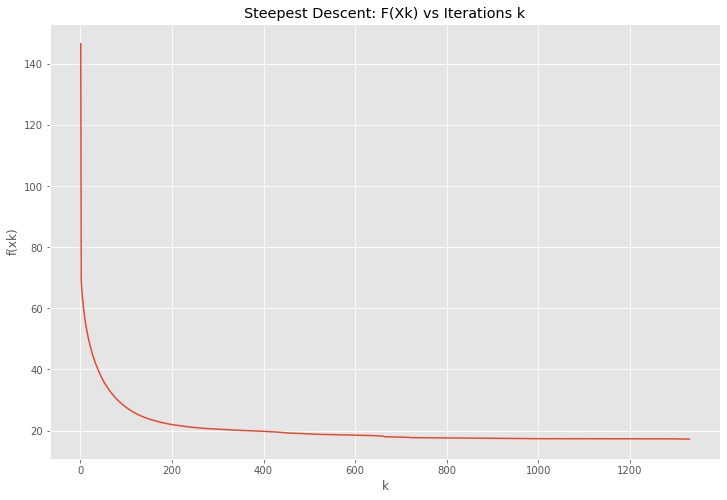

In [42]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('f(xk)')
ax.set_xlabel('k')
_=ax.plot(data["Iteration"], data["FXk"])
plt.title("Steepest Descent: F(Xk) vs Iterations k")
plt.savefig("gd_plot.png", dpi=300, transparent=True)

# Q3) Critical Points of a function (3 marks)

i) Generate a third degree polynomial in x and y named g(x, y) that is based on your mobile number (Note : In case there is a 0 in one of the digits replace it by 3). Suppose your mobile number is 9412821233, then the polynomial would be g(x, y) = 9x3 − 4x2y + 1xy2 − 2y3 + 8x2 − 2xy + y2 − 2x + 3y − 3, where alternate positive and negative sign are used.

                        Deliverable(s) : The polynomial constructed should be reported. (0.5)
                        
-----------------------------------------------------------------------------------------------------------------------

In [43]:
'''
This method generates third degree ploynomial in x and y based on mobile number with alternative sign used
mobile_no: input mobile number as string
'''
def generate_polynomial(mobile_no="9999111111"):
    modified_mobile_no = ""
    for digit in mobile_no:
        if digit == "0":
            modified_mobile_no = modified_mobile_no + "3"
        else:
            modified_mobile_no = modified_mobile_no + digit
    polys = ["*x**3", "*x**2*y", "*x*y**2", "*y**3", "*x**2", "*x*y", "*y**2", "*x", "*y", ""]
    g_of_x_y = ""
    for digit_idx in range(len(modified_mobile_no)):
        if digit_idx == 0:
            g_of_x_y = modified_mobile_no[digit_idx] + polys[digit_idx]
        else:
            sign = "+" if digit_idx % 2 == 0 else "-"
            g_of_x_y = "{0} {1} {2}{3}".format(g_of_x_y, sign, modified_mobile_no[digit_idx], polys[digit_idx])
    return g_of_x_y

In [44]:
'''
Main entry point method for the Q3 part i answer to generate polynomial
'''
print(f"Third Degree Ploynomial g(x,y): {generate_polynomial('9999111111')}")

Third Degree Ploynomial g(x,y): 9*x**3 - 9*x**2*y + 9*x*y**2 - 9*y**3 + 1*x**2 - 1*x*y + 1*y**2 - 1*x + 1*y - 1


ii) Write a code to find all critical points of g(x, y). You may use built in functions like ’solve’ (or other similar functions) in Octave/Matlab to find the critical points .

                       Deliverable(s) : The code that finds the critical points along with the 
                                  display of all the calculated critical points. (1)
                                  
-----------------------------------------------------------------------------------------------------------------------

##### Note: Not profiecient in Octave/Matlab so using python for this question and as mentioned can use in-built functions like 'solve', using sympy in python which is equivalent

In [46]:
from sympy import symbols, Function, simplify, Matrix, hessian, solve

In [47]:
'''
This method calculates the critical points of g(x,y)
f: input function g(x,y)
'''
def calculate_critical_points(f):
    x, y = symbols('x y')
    
    v = Matrix([x, y])
    f = Matrix([f])
    gradf = simplify(f.jacobian(v))
    hessianf = simplify(hessian(f, v))
    crit = solve(gradf, v)
    return crit, hessianf, v

In [48]:
'''
Main entry point method for the Q3 part ii answer to calculate critical points for a fuction g(x,y)
'''
def run_critical_points_calc(mob_no="9999111111"):
    f = symbols('f', cls=Function)
    f = simplify(generate_polynomial(mob_no))
    critical_points, hessianf, v = calculate_critical_points(f)
    for point_idx in range(len(critical_points)):
        print(f"Critical Point{point_idx+1}: {critical_points[point_idx]}\n")

In [49]:
run_critical_points_calc()

Critical Point1: (-1/6, 1/6)

Critical Point2: (1/9, -1/9)

Critical Point3: (-47*sqrt(3)/180 - 108*(1/36 + 5*sqrt(3)/36)**2/25 - 23/900 + 1296*(1/36 + 5*sqrt(3)/36)**3/25, 1/36 + 5*sqrt(3)/36)

Critical Point4: (1296*(1/36 - 5*sqrt(3)/36)**3/25 - 108*(1/36 - 5*sqrt(3)/36)**2/25 - 23/900 + 47*sqrt(3)/180, 1/36 - 5*sqrt(3)/36)



iii) Write a code to determine whether they correspond to a maximum, minimum or a saddle point.

                     Deliverable(s) : The code that identifies the type of critical points. The 
                     critical points and their type must be presented in the form of the table 
                              generated by code for the above polynomial. (1.5 marks)
                              
-----------------------------------------------------------------------------------------------------------------------

In [51]:
import scipy.linalg as la
import numpy as np

In [52]:
'''
Main entry point method for the Q3 part iii answer to characterize critical points for a fuction g(x,y)
'''
def run_critical_points_characterization(mob_no="9999111322"):
    f = symbols('f', cls=Function)
    f = simplify(generate_polynomial(mob_no))
    
    critical_points, hessianf, v = calculate_critical_points(f)
    
    for point in critical_points:
        try:
            h = np.array(hessianf.subs(dict(zip(v, point)))).astype('float')
            l,v_ = la.eig(h)
            if(np.all(np.greater(l,np.zeros(2)))):
                print(f"Function has a minimum point at: {point}\n")
            elif(np.all(np.less(l,np.zeros(2)))):
                print(f"Function has a maximum point at: {point}\n")
            else:
                print(f"Function has a saddle point at: {point}\n")
        except TypeError:
            # Skip for the Imaginary points
            pass

In [53]:
run_critical_points_characterization("9999111322")

Function has a minimum point at: (1296*(1/36 - sqrt(86 - sqrt(3289))/36)**3/37 - 108*(1/36 - sqrt(86 - sqrt(3289))/36)**2/37 - 35/1332 + 95*sqrt(86 - sqrt(3289))/1332, 1/36 - sqrt(86 - sqrt(3289))/36)

Function has a saddle point at: (1296*(1/36 - sqrt(sqrt(3289) + 86)/36)**3/37 - 108*(1/36 - sqrt(sqrt(3289) + 86)/36)**2/37 - 35/1332 + 95*sqrt(sqrt(3289) + 86)/1332, 1/36 - sqrt(sqrt(3289) + 86)/36)

Function has a maximum point at: (-95*sqrt(86 - sqrt(3289))/1332 - 108*(1/36 + sqrt(86 - sqrt(3289))/36)**2/37 - 35/1332 + 1296*(1/36 + sqrt(86 - sqrt(3289))/36)**3/37, 1/36 + sqrt(86 - sqrt(3289))/36)

Function has a saddle point at: (-95*sqrt(sqrt(3289) + 86)/1332 - 108*(1/36 + sqrt(sqrt(3289) + 86)/36)**2/37 - 35/1332 + 1296*(1/36 + sqrt(sqrt(3289) + 86)/36)**3/37, 1/36 + sqrt(sqrt(3289) + 86)/36)

